In [32]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

plt.rcParams["axes.formatter.use_mathtext"] = True 
sns.set(font="cmr10")
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid", context="paper", font="cmr10")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

def save_figure(name):
    plt.savefig(f"exports/{name}.pdf", format="pdf", bbox_inches="tight")

def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legend_handles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

In [4]:
data = pd.read_csv("datasets/demographics_merged.csv")
data.head()

,Participant ID,[Participant] Gender,[Participant] Age,[Participant] Studies Level,[Participant] Reddit Usage,[Participant] Social Media Usage,[Participant] Fake News Ability,[Participant] Reddit As News Source,[Participant] Reddit Credibility Evaluation,Ethnicity simplified,Nationality
0,5c33da29221fad0001cc605a,Female,30,Undergraduate,5.0,5.0,4.0,Easy to confuse upvotes with credibility. Very...,"As above, I look at link and number of upvotes",White,United Kingdom
1,577a04dbadbc7500015d2475,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,White,United Kingdom
2,5bd3a8173043160001943d9b,Female,54,NaN,NaN,NaN,NaN,NaN,NaN,White,Australia
3,5cae09506d573900175d4727,Male,24,Graduate,5.0,5.0,4.0,I don't generally use it as news source but I ...,Usually I look at karma of the post then I rea...,White,Portugal
4,5d21f63e4c6155001b9199e1,Female,22,Undergraduate,5.0,4.0,4.0,"I like it, but we have to keep in mind that wh...","I can't until I open it up. But if I can't, I ...",White,Portugal


In [5]:
participant_id = "Participant ID"

age = "[Participant] Age"
gender = "[Participant] Gender"
nationality = "Nationality"
ethnicity = "Ethnicity simplified"

study_level = "[Participant] Studies Level"
reddit_usage = "[Participant] Reddit Usage"
social_usage = "[Participant] Social Media Usage"
fake_news_ability = "[Participant] Fake News Ability"
reddit_as_news = "[Participant] Reddit As News Source"
own_credibility_evaluation = "[Participant] Reddit Credibility Evaluation"

In [6]:
data[ethnicity].value_counts()

Ethnicity simplified
White    64
Black     2
Other     1
Asian     1
Name: count, dtype: int64

In [7]:
data[[nationality, gender]].value_counts(normalize=True) * 100

Nationality     [Participant] Gender
United Kingdom  Female                  26.470588
Italy           Female                   8.823529
United Kingdom  Male                     7.352941
Poland          Female                   7.352941
Portugal        Male                     5.882353
Poland          Male                     5.882353
Portugal        Female                   4.411765
New Zealand     Male                     2.941176
Netherlands     Male                     2.941176
United States   Female                   2.941176
Italy           Male                     2.941176
Hungary         Male                     2.941176
Canada          Female                   2.941176
Netherlands     Female                   1.470588
Mexico          Male                     1.470588
Australia       Female                   1.470588
Ireland         Female                   1.470588
Greece          Male                     1.470588
Slovenia        Female                   1.470588
South Africa 

In [8]:
data[[study_level, gender]].value_counts(normalize=True) * 100

[Participant] Studies Level  [Participant] Gender
Undergraduate                Female                  24.242424
                             Male                    18.181818
Secondary                    Female                  13.636364
Graduate                     Female                  10.606061
                             Male                    10.606061
Post-Secondary               Female                  10.606061
                             Male                     7.575758
Doctoral                     Female                   3.030303
Secondary                    Male                     1.515152
Name: proportion, dtype: float64

In [9]:
data[[study_level]].value_counts(normalize=True) * 100

[Participant] Studies Level
Undergraduate                  42.424242
Graduate                       21.212121
Post-Secondary                 18.181818
Secondary                      15.151515
Doctoral                        3.030303
Name: proportion, dtype: float64

In [10]:
data[gender].value_counts()

[Participant] Gender
Female    43
Male      25
Name: count, dtype: int64

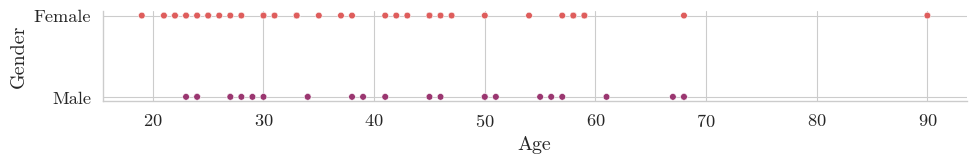

In [11]:
plot = sns.relplot(data=data[[age, gender]], x=age, y=gender, hue=gender, palette="flare")
plt.tight_layout(pad=0, w_pad=0, h_pad=8)
plot.figure.set_size_inches(10, 1)
plot._legend.remove()
plot.set_xlabels("Age")
plot.set_ylabels("Gender")
save_figure("gender_age")

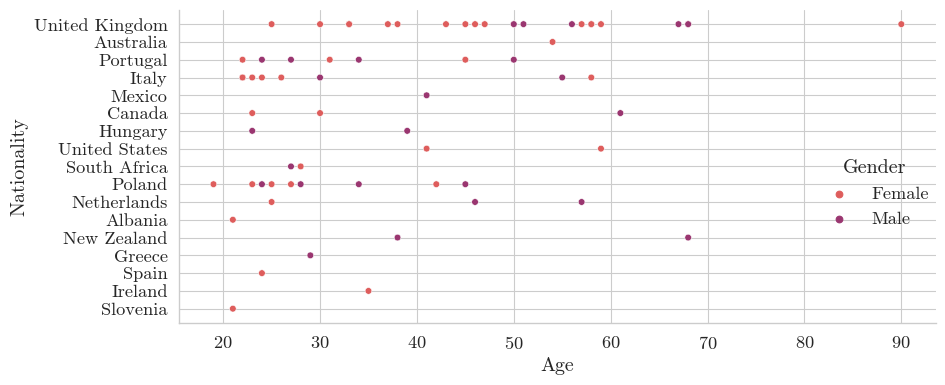

In [12]:
plot = sns.relplot(
    data,
    x=age,
    y=nationality,
    hue=gender,
    palette="flare"
)

plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plot.figure.set_size_inches(10, 3.5)
plot.legend.set_title("Gender")
plot.set_xlabels("Age")
plot.set_ylabels("Nationality")
save_figure("nationalities_by_gender_and_age")

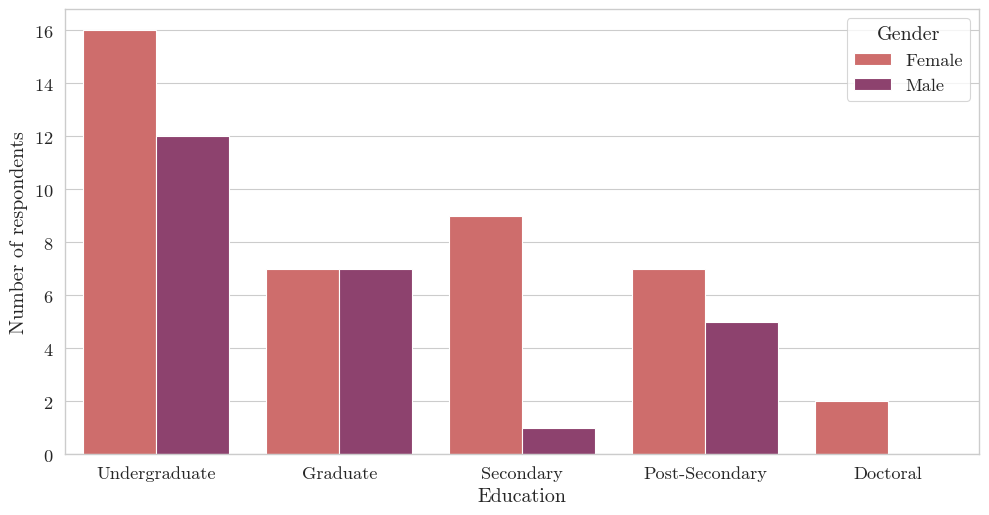

In [13]:
plot = sns.countplot(data=data[[study_level, gender]], x=study_level, hue=gender, palette="flare")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plot.figure.set_size_inches(10, 5)
plot.legend_.set_title("Gender")
plot.set_xlabel("Education")
plot.set_ylabel("Number of respondents")
save_figure("respondents_by_education_and_gender")

----

In [14]:
isFemale = data[gender] == "Female"
isMale = data[gender] == "Male"

# Usage of social media

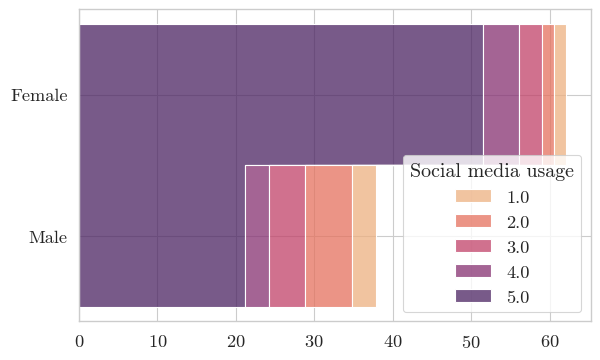

In [15]:
plot = sns.histplot(data, y=gender, hue=social_usage, multiple="stack", stat="percent", element="step", palette="flare")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
move_legend(plot, "lower right")

plot.figure.set_size_inches(6, 3.5)
plot.set_xlabel(None)
plot.set_ylabel(None)
plot.legend_.set_title("Social media usage")
save_figure("social_media_by_gender")

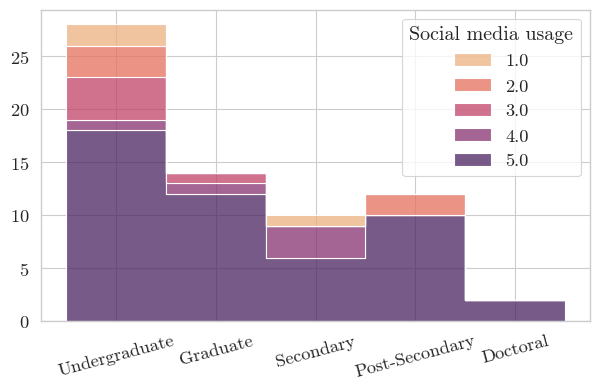

In [16]:
plot = sns.histplot(data, x=study_level, hue=social_usage, multiple="stack", element="step", palette="flare")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.xticks(rotation=15)
plot.figure.set_size_inches(6, 3.5)
plot.set_xlabel(None)
plot.set_ylabel(None)
plot.legend_.set_title("Social media usage")
save_figure("social_media_by_education")

In [17]:
data[data[gender] == "Female"][[social_usage]].value_counts(normalize=True) * 100

[Participant] Social Media Usage
5.0                                 82.926829
4.0                                  7.317073
3.0                                  4.878049
1.0                                  2.439024
2.0                                  2.439024
Name: proportion, dtype: float64

In [18]:
data[data[gender] == "Male"][[social_usage]].value_counts(normalize=True) * 100

[Participant] Social Media Usage
5.0                                 56.0
2.0                                 16.0
3.0                                 12.0
1.0                                  8.0
4.0                                  8.0
Name: proportion, dtype: float64

# Usage of reddit

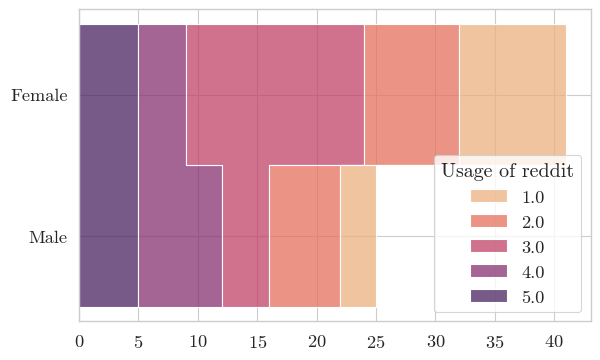

In [19]:
plot = sns.histplot(data=data[[reddit_usage, gender]], y=gender, hue=reddit_usage,multiple="stack", element="step", palette="flare")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plot.figure.set_size_inches(6, 3.5)
move_legend(plot, "lower right")

plot.legend_.set_title("Usage of reddit")
plot.set_xlabel(None)
plot.set_ylabel(None)
save_figure("reddit_usage_by_gender")

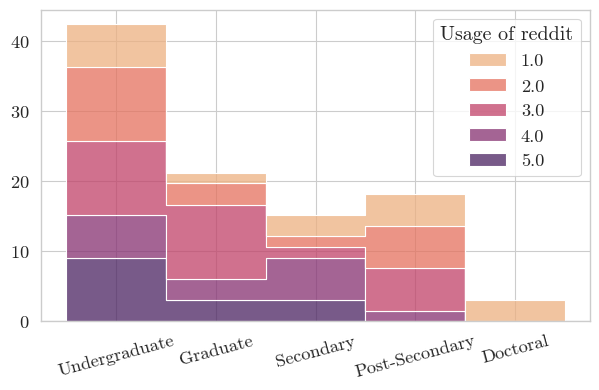

In [20]:
plot = sns.histplot(data, x=study_level, hue=reddit_usage, multiple="stack", element="step", stat="percent", palette="flare")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.xticks(rotation=15)

plot.figure.set_size_inches(6, 3.5)
plot.set_xlabel(None)
plot.set_ylabel(None)
plot.legend_.set_title("Usage of reddit")
save_figure("reddit_usage_by_education")

In [21]:
data[[reddit_usage]].value_counts(normalize=True) * 100

[Participant] Reddit Usage
3.0                           28.787879
2.0                           21.212121
1.0                           18.181818
4.0                           16.666667
5.0                           15.151515
Name: proportion, dtype: float64

In [22]:
data[isFemale][[reddit_usage]].value_counts(normalize=True) * 100

[Participant] Reddit Usage
3.0                           36.585366
1.0                           21.951220
2.0                           19.512195
5.0                           12.195122
4.0                            9.756098
Name: proportion, dtype: float64

In [23]:
data[isMale][[reddit_usage]].value_counts(normalize=True) * 100

[Participant] Reddit Usage
4.0                           28.0
2.0                           24.0
5.0                           20.0
3.0                           16.0
1.0                           12.0
Name: proportion, dtype: float64

# Ability to detect fake news

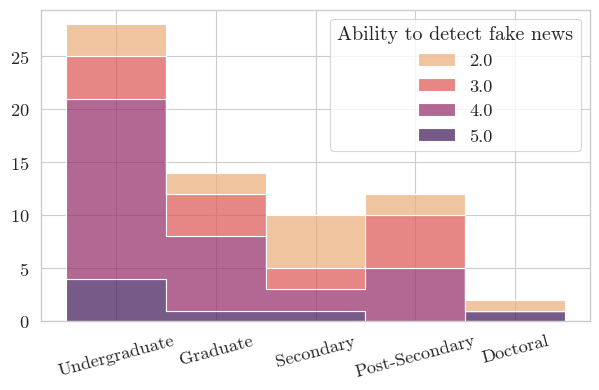

In [24]:
plot = sns.histplot(data, x=study_level, hue=fake_news_ability, multiple="stack", element="step", palette="flare")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.xticks(rotation=15)

plot.figure.set_size_inches(6, 3.5)
plot.set_xlabel(None)
plot.set_ylabel(None)
plot.legend_.set_title("Ability to detect fake news")
save_figure("fake_news_ability_by_study_level")

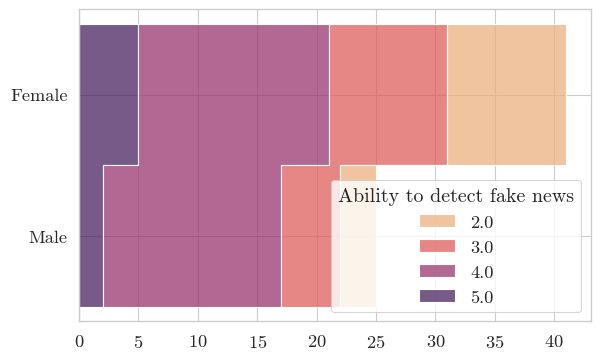

In [25]:
plot = sns.histplot(data=data[[fake_news_ability, gender]], y=gender, hue=fake_news_ability,multiple="stack", element="step", palette="flare")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
move_legend(plot, "lower right")

plot.figure.set_size_inches(6, 3.5)
plot.legend_.set_title("Ability to detect fake news")
plot.set_xlabel(None)
plot.set_ylabel(None)
save_figure("fake_news_ability_by_gender")

In [26]:
data[[fake_news_ability]].value_counts(normalize=True) * 100

[Participant] Fake News Ability
4.0                                46.969697
3.0                                22.727273
2.0                                19.696970
5.0                                10.606061
Name: proportion, dtype: float64

In [27]:
data[isFemale][[fake_news_ability]].value_counts(normalize=True) * 100

[Participant] Fake News Ability
4.0                                39.024390
2.0                                24.390244
3.0                                24.390244
5.0                                12.195122
Name: proportion, dtype: float64

In [28]:
data[isMale][[fake_news_ability]].value_counts(normalize=True) * 100

[Participant] Fake News Ability
4.0                                60.0
3.0                                20.0
2.0                                12.0
5.0                                 8.0
Name: proportion, dtype: float64

# Free text analysis

In [30]:
text = data[own_credibility_evaluation].dropna().to_dict()
all_evaluations = "\n".join(list(text.values()))


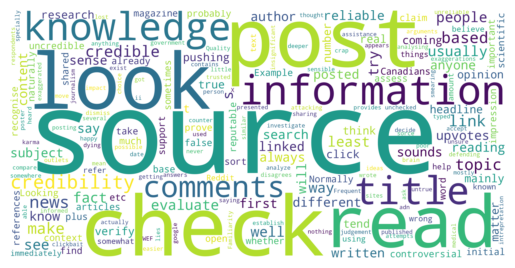

In [44]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add("use")
stopwords.add("article")

cloud = WordCloud(background_color="white", stopwords=stopwords, width=3000, height=1500).generate(all_evaluations)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("own_credibility_evaluation.png", dpi=300, bbox_inches="tight")

# Own credibility evaluation responses

- As above, I look at link and number of upvotes

- Usually I look at karma of the post then I read the comments to see if anyone disagrees with the post and provides facts against it. Then I decide if I should read it (credible) or not (uncredible). 

- I can't until I open it up. But if I can't, I check the source, the date, sort the comments by controversial and try to analyze the answers that each of them got so I know how people are defending or attacking the post and evaluate if their arguments make sense.

- I look at the source first and then I try to evaluate if what they are saying also makes sense

- Based on the source, the author, my knowledge of the matter and the use of exaggerations, unchecked "facts".

- I always check or investigate other sources

- Who its published by and if it actually sounds possible or not. Anyone pushing government ideas is usually untrue or just pushing lies. Like anything that the WEF are pushing down people. You will own nothing and be happy who believes that crap 

- I check the topic and where it is coming from. Normally I would ask google it if I was unsure. 

- Looking at the source, comments and my own opinion and knowledge on the matter.

- just by reading the title i think I'm able to establish if the information i'm presented with is true, false or exaggerated (based on my knowledge). then i check where the article is coming from. if it's a source that i find unreliable  or that i've never heard of i would probably dismiss the article. if it's from a reliable source ii would probably just accept the information adn move on

- Above of all I base the intrepretation of the News with my knowledge

- I compare what I'm reading with what I already know

- I click on the linked article and after analysing the way it is written I try to search the same topic to find similar articles. I will also sometimes click on the linked sources to verify them

- I thought about what knowledge I have about each topic.

- By getting information from a reputable source.

- I use my brain

- Check the source use my judgement check against a trusted news sorce

- It is important who posted the information and what sources it refers to. Frequent sharing does not prove credibility at all. It's easier to assess credibility if you know a little more about its subject

- By looking deeper into a subject so I can make an informed choice.

- Familiarity with context and source, source credibility itself, references used, counter search to see if references exist and say what they mean to say. Example: several news outlets are posting "65% of Canadians support medical assistance in dying", when it's in fact 65% of the 1000 respondents, which is an insignificant number of Canadians. Fact check, and clickbait headline. News and journalism have lost their ways.

- Quality of information, how it is typed, who wrote it

- I tend to search of other sources specially if the topic has an impact on me

- poor

- mostly based on the source

- I search for the poster on sites like Linked-in etc

- By how much information is in the title and also if the source information is somewhere I recognise or appears sensible to me.

- 1. I see if it contains any attempts of smearing. Does the post claim that person X is responsible for Y?

- Would have to read more than just the headline and would take account of who posted and what it said.  By the way, there's no such word as "uncredible", the opposite of credible is incredible.

- Based on plus and minus reviews

- I always check other sources of information to verify if it's true or false. 

- If it sounds to good to be true it usually is

- first i look at the tone of the title. is it very alarmistic, panicked, angry? then i look at what the title says, does it explain the content well or is it written badly? then i look at the source.  after that i look at the content and read the comments. often the comments will have more information about the credibility of the post

- Source, subreddit, comments, language of the post, content.

- I evaluate the credibility of a post firstly by seeing the link with the page that has posted the article. If it's a scientific insitution or a newspaper/magazine that I trusth, then I deem it as credible. I also notice the clarity of the article title, and then the comments below, to see if anyone has complained about the article's credibility, with of course other data to prove why it could be not credible.

- Mainly the link the information came from

- I have to read over half the post before I garner an opinion.  If I feel credible will usually finish article.  I

- I evaluate the headline and where it's been posted from, as well as checking the profile of the user who has shared the post, to see what sort of other posts they've shared in the past; it all helps to evaluate whether they are a genuine news source or not.

- I use common sense plus whatever knowledge I possess on the topic

- I research the source it’s coming from and pick out whether it’s misleading or being honest of what’s being told.

- I tend to use what I’ve already seen in the news as my own source of credibility 

- I read it then figure it out. f it sounds stupid delete

- In terms of initial impression, I look to the layout of the post. If the title is easy to read, unopinionated, and the photo chosen is also clear and coherent, I naturally perceive it as more reliable. However, if the title is too wordy, uses incorrect spellings/grammar, or written in an unprofessional way, then I naturally discredit it. After initial impressions, I mainly look then to the link attached. If I recognise the source to be relatively objective and reliable, then I don’t question it much more. However, links to pop-culture blogs or news immediately makes it seem like an opinion-piece to me, rather than an unbiased article. Additionally, the interactions on the post give me some insight into its credibility. For example, a post with lots of comments, and a high amount of upvotes makes me assume that it’s at least somewhat credible (or at least, not obviously wrong).

- The best way is to always read it yourself and then check what other sources have to say on the same matter. Reading the comments sometimes help as well as there can be constructive criticism. 

- I read and try to assess within my limited understanding. 

- recall my knowledge on subject but in future having a real post like this would also use internet to confirm at least 2 different sources of it with 2 different confirmations using 2 different sources

- With my knowledge and that of others 

- Wheter they use controversial content to attract people's attention or provoke them to click on link or state to the facts and telling what article is about without unnecessary words 

- I always need to contrast its information with other sources, because anyone can write a Reddit post.

- I tend to go through the article and then continue my own reasourch afterwards

- Normally I’d check other sources to verify it in a real life situation, although I couldn’t do it in this survey so I just went with my gut.

- Where it comes from, what evidence is given to support the claim 

- First I check the credibility of the title, then I check the authority of the source

- Just using my intuition 

- Look for the source, is this source real, what is the motive, how is the text written..

- Sources mentioned amount of upvotes but generally I use my own initiative and research topics myself before believing them on a platform like Reddit.

- I check it on other at least 2 independent sources. Then at least I can somewhat think its the truth 

- I base it on my logical process. If it doesn’t make sense I research more

- I use my own knowledge and the mainstream of the articles I have read on the subject as a basis

- Reading the title, mainly, and then look at the number of upvotes 

- As above - I would look at the original scientific article(s) and/or read interviews in full to ensure I have the context 

- First, I check that the title is understandable to me and sounds plausible. I look immediately at the source - is it a well-known trade magazine, or maybe the website of some TV station? Later, I open the article or video and check the sources it is based on. Does the author of the text refer to reliable publications, or is it based only on rumors? I also check who are the people, guests, scientists the author is referring to. I also wonder if what the author presents is consistent with my thinking. I try not to believe someone just because they are well-known. Because, after all, famous people, even journalists, are also wrong.

- Sources, is it linked to a reputable organisation

- I think about how likely it is then look it up elsewhere I usually take everything with a pinch of salt 

- Differenf posts require different types of analysis, I suppose the source is the most important element, but other things e.g. does it accord with my experience, things I've previously read etc.

- Wit the knowledge I have

- If i know it or not

# Notable mentions

## What they do to check credibility
- **link**, **number of upvotes**
- **karma**, **comments** to see if **anyone disagrees** and **provides facts** against it
- **check the source**, **the date**, **sort the comments**
- **source first**
- **source**, **the author**, **my knowledge** of the matter and the **use of exaggerations**
- **other sources** first
- **Who its published by** and if it actually **sounds possible** or not
- based on title alone, 

In [51]:
text = data[reddit_as_news].dropna().to_dict()
all_evaluations = "\n".join(list(text.values()))
all_evaluations

'Easy to confuse upvotes with credibility. Very important to have credible links as that’s what I use to judge credibility of the post\nI don\'t generally use it as news source but I would rate it as a decent outlet for news as the website offers easy access to the consensus of the community (using the karma system). Although the most upvoted opinion is also not always correct. \nI like it, but we have to keep in mind that when we browse specific subreddits we will only have access to information that those people like to share (e.g. democrat vs republican subreddits). We need to be critical of everything we read.\nI don\'t use it as  a news source because it feels unreiable\nThe main problem is that it collects articles from too many sources, some credible and some not. \nI don\'t use it frequently but I think Is not a good source for news or to be informed\nthere is a lot of fake news on both sides there imo full of government paid trolls. But it does deppends on the groups I\'m a me

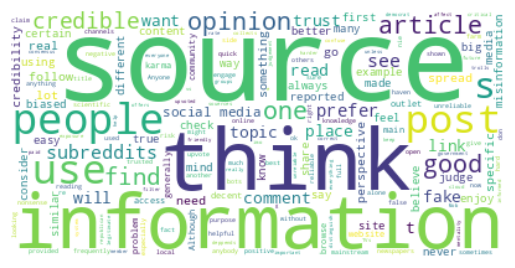

In [53]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add("reddit")
stopwords.add("news")

cloud = WordCloud(background_color="white", stopwords=stopwords).generate(all_evaluations)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("exports/reddit_as_news.png", dpi=300, bbox_inches="tight")

# Reddit as a news source

- Easy to confuse upvotes with credibility. Very important to have credible links as that’s what I use to judge credibility of the post

- I don't generally use it as news source but I would rate it as a decent outlet for news as the website offers easy access to the consensus of the community (using the karma system). Although the most upvoted opinion is also not always correct. 

- I like it, but we have to keep in mind that when we browse specific subreddits we will only have access to information that those people like to share (e.g. democrat vs republican subreddits). We need to be critical of everything we read.

- I don't use it as  a news source because it feels unreiable

- The main problem is that it collects articles from too many sources, some credible and some not. 

- I don't use it frequently but I think Is not a good source for news or to be informed

- there is a lot of fake news on both sides there imo full of government paid trolls. But it does deppends on the groups I'm a member of some really good ones where everyone is friendly and helpful.(but not news ones)

- I like the exposure to different news, but it is hard to know if the news is real or fake, unless a link is provided to a legitimate news source.

- It's not the best. Mob mentality can affect one's opinion and cloud their judgement.

- it's harder to filter information when anybody can share the articles they prefer, but the community can help distinguish what's fake from what's true through the comments

- As big future perspectives

- I prefer other souerces, like TVs, newspapers, online trusted media

- I follow some subreddits that specifically focus on news, but I became aware with time that while some are more controlled than others, not all news reported might be true or reported in the right way. Because of this, sometimes I struggle to understand what reported news is true or not. On the other hand, what I like about using Reddit as a news source is that it is quite varied in the way it covers news from many countries, with occasional amateurish videos that are very informative.

- It is just not a known source to go for news. Maybe needs to be more established.

- I think it's a good source of news and all that's required is verification. 

- Very dangerous as it spreads nonsense

- Anyone can post so it's not real news like any social media

- some information is reliable and some is not, you have to be careful with that - it's not a convenient source of information

- I do not trust any news source until I check deeper into something myself. For example, the mainstream media only ever seems to give one side of the story so I look for different sources as well because our news i s basically censored! I like to do research and make my own mind up.

- I don't go there for news.

- Its great for certain types of content

- I think its somehow a good source because it shares also a lot of stories about real people 

- like all currently, unreliable with a high possibility of manipulation

- Unreliable like all social media

- It is hard to find out information like the credentials of the posters

- I have always viewed it as a place to get opinions and prompt some information but not for a credible place to source information. Which is why I don't use it regularly. 

- I do not consider Reddit as a news source. I consider it a forum to talk about certain topics and find out more opinions on the matters. My overall perception of people that use Reddit too much is that they consider themselves enlightened while not being able to cite sources or evaluate on sensitive topics.

- I think it could be used to promote misinformation

- It's a pretty decent portal, the articles in it are mostly credible, if something is wrong, they are downvoted

- Like anything on the I, the viewer needs to be sceptical and find more information from other sources to confirm or deny the post. 

- Don't know it

- reddit feels like a more immediate news source because it's made of people posting and not some organization. plus with all the different subreddits it's easy to find news about something happening in a particular niche (one example could be r/hobbydrama). this leads to both positive and negative aspects: for the positive i would put people reporting local news that networks won't or won't just as quick, like a school shooting. the main negative is that actually a lot of posts are not made by people but by bots to farm karma and to influence people. especially after all the news about the russian bots farm came. another big danger is the eco chamber phenomenum, especially in radicalizing young men into far right and inceldom.

- I think reddit is an average news source depending on the subreddits that you visit.

- I have very mixed feelings on reddit as anews source because it completely depends on what subreddits you decide to follow, and what you engage with at most. So if I was for example to constantly follow and engage with anti vaccine content, I would be shown fake news frequently. If I only am exposed to fake news then that limits my perspective. I do enjoy reading scientific information there, and prefer it to some other social media for that purpose, as I see mane commenters judge on the quality and truthfulness of the articles.

- It is eye opening, I find out things I otherwise wouldn’t know

- Reddit is to me just a jump off area for oddball news.  I trust some articles, others I dont.

- I don't tend to think of Reddit as a news source as such; I usually browse other threads related to my hobbies or interests. It's not that there aren't credible news posts on Reddit, it's just not the first site I think of

- I have no knowledge of Reddit so I am unable to comment

- For the most part, it’s not a good place as most posts I see are biased and regurgitate what mainstream media says

- I enjoy it as I love the open comment ability. I enjoy reading people’s responses to articles.

- it's just ok

- I think that Reddit can be a good place to read lots of perspectives on one topic and give yourself a broader range of information. Within one post’s comment section, you’re likely to see varying opinions, which may open up your mind to a perspective you haven’t yet been looking from. The same cannot be said for news channels or specific newspapers/blogs/websites. Many are privately owned, and when one person has control over the content, it’s not unlikely that they’re pushing their own agendas and opinions. Hence, Reddit is a better place to widen your view. However, anybody can post on Reddit. While all of the articles shown in this study provided links, some of the links were biased news sources, which brings us back to square one. Being a social media, people can be very quick to spread misinformation without properly checking what they say. Whether that’s due to malicious intentions or pure ignorance, there is always a risk that what you read on Reddit is simply a trending falsity. 

- I think it's nice that anyone can post, upvote, downvote and comment. However I find it problematic that certain subreddits prefer specific news sources and channels.

- I have no knowledge so can have no opinion. 

- shall be some additional information, posts are too short to believe

- I think it's not bad

- It could be beneficial, because people using reddit to get someone's opinion. But it would be difficult to trust sources at first

- I don't think it's the best source of information. It can be helpful for those aiming to find people living similar circumstances or in a similar situation, as to feel understood and not alone, but in terms of credibility I think it is not a reliable source of information.

- I think it is in a way similar to twitter. It has potential to spread news, but also to spread false info.

- It’s ok but mainly opinion so can be biased or downright nonsense

- Never use it as I’m not sure if it’s credibility 

- reliable enough

- Unsure as not used it much

- Cannot be trusted. I only trust the official news sites and programs. Also, I do not want to see any discussions about news. I only want the facts.

- I generally don’t trust it as a news source. I use it for entertainment purposes only.

- I don't see this platform as a very credible source. You can anonymously(!) write anything you want and people will believe in it

- I sometimes follow a link to Reddit but I never use it as a news source deliberately 

- I believe it is no better and no worse than other online sources of information

- Can be good now and again 

- I don’t use it and haven’t ever considered looking there for news. I would prefer to go to standard news outlets however I still take what they say with a big pinch of salt. Any claims from a headline I would want to see the original peer reviewed article (if a scientific claim is being made) or read the speakers interview in full (if they are being quoted without the context in tbe title) before deciding if something is credible. 

- The problem with Reddit is that you have to judge what will be in the article based on the title alone. First - is it interesting and you want to go there, and second - is it real. I think if you are watching specific topics on reddit, it might be good for you. But the risk is that it will surface a topic that is just popular now, and not necessarily relevant. You're also never sure if a user isn't intentionally introducing misinformation. You have to be careful. I prefer local news sites, where publications are handled by journalists and editors are responsible for accuracy. Then there is a better chance that what I read or see will be the truth.

- It's good to find out what's going on but you need to fact check and check sources 

- I don't use it as a news source as there is false news 

- Sorry, I no absolutely nothing a bout "reddit" although I have heard the name.

- Doesn't provide actual accurate information

- Just another social media not needed